Systems: for $x \in ( 0, L) , t > 0,$
\begin{eqnarray*}
  \frac{\partial R}{\partial t} & = & \delta \frac{\partial^2 R}{\partial^2 x}
  - \nu \frac{\partial R}{\partial x} - q_{1 r} h_1 ( R, P) u_1 - q_{2 r} h_2
  ( R, P) u_2\cr 
  \frac{\partial P}{\partial t} & = & \delta \frac{\partial^2 P}{\partial^2 x}
  - \nu \frac{\partial P}{\partial x} - q_{1 p} h_1 ( R, P) u_1 - q_{2 p} h_2
  ( R, P) u_2\cr
  \frac{\partial u_1}{\partial t} & = & \delta \frac{\partial^2
  u_1}{\partial^2 x} - \nu \frac{\partial u_1}{\partial x} + h_1 ( R, P) u_1\cr
  \frac{\partial u_2}{\partial t} & = & \delta \frac{\partial^2
  u_2}{\partial^2 x} - \nu \frac{\partial u_2}{\partial x} + h_2 ( R, P) u_2
\end{eqnarray*}

Boundary conditions:
\begin{eqnarray*}
  \nu R ( 0, t) - \delta \frac{\partial R}{\partial x} & = & \nu R^{( 0)} (
  t),\cr
  \nu P ( 0, t) - \delta \frac{\partial P}{\partial x} & = & \nu P^{( 0)} (
  t),\cr
  \nu u_i ( 0, t) - \delta \frac{\partial u_i}{\partial x} & = & 0,
  \hspace{1em} i = 1, 2,\cr
  \frac{\partial R}{\partial x} ( L, t) = \frac{\partial P}{\partial x} ( L,
  t) & = & \frac{\partial u_i}{\partial x} ( L, t) = 0, \hspace{1em} i = 1, 2,
\end{eqnarray*}

Initial conditions: $x \in ( 0, L),$
\begin{eqnarray*}
  R ( x, 0) & = & R^0 ( x) \geqslant 0,\cr
  P ( x, 0) & = & P^0 ( x) \geqslant 0,\cr
  u_i ( x, 0) & = & u_i^0 \geqslant 0, i = 1, 2,
\end{eqnarray*}


Master Equation:
<ol>
    <li>
        \begin{eqnarray*}
        \frac{R^{j + 1}_i - R^j_i}{d t} & = & \delta \frac{R^j_{i + 1} - 2
        R^j_i + R^j_{i - 1}}{ ( d x)^2} - \nu \frac{R^j_{i + 1} - R^j_{i -
        1}}{2 d x}\cr
        &  & - q_1 h_1 u^j_1 - q_2 h_2 u_2^j\cr
        \Rightarrow R^{j + 1}_i & = & \frac{\delta d t}{( d x)^2} ( R^j_{i +
        1} + R^j_{i - 1}) + \left( 1 - \frac{2 \delta d t}{( d x)^2} \right)
        R^{^{} j}_i\cr
        &  & + \frac{\nu d t}{2 d x} ( R^j_{i - 1} - R^j_{i + 1}) - d t ( q_1
        h_1 u^j_1 + q_2 h_2 u^j_2)\\
        u^{j + 1}_{k, i} & = & \frac{\delta d t}{( d x)^2} ( u^j_{k, i + 1} +
        u^j_{k, i - 1}) + \left( 1 - \frac{2 \delta d t}{( d x)^2} \right)
        u^j_{k, i}\cr
        &  & + \frac{\nu d t}{2 d x} ( u^j_{k, i - 1} - u^j_{i + 1}) + d t
        h_k u^j_{k, i}, k = 1, 2
      \end{eqnarray*}
    </li>
    
    <li> 
        
         Left boundary conditions:
  \begin{eqnarray*}
    \nu R_0 - \delta \frac{R_1 - R_{- 1}}{2 d x} & = & \nu R^{( 0)}\cr
    \Rightarrow R_{- 1} & = & \frac{2 \nu d x}{\delta} ( R^{( 0)} - R_0) +
    R_1\cr
    \Rightarrow P_{- 1} & = & \frac{2 \nu d x}{\delta} ( P^{( 0)} - P_0) +
    P_1\cr
    u_{i, - 1} & = & - \frac{2 \nu d x}{\delta} u_{i, 0} + u_{i, 1}, i = 1, 2 \text{}
  \end{eqnarray*}
        Right boundary conditions: $g = R, P, u_i, i = 1, 2$
  \begin{eqnarray*}
    g_M & = & g_{M - 1}
  \end{eqnarray*}
        
    </li>
    
</ol>       

In [1]:
from numpy import *
from scipy import *
#from scitools.all import *
#from scitools.easyviz import *
#from scitools.StringFunction import StringFunction
#from matplotlib.pyplot import *
import matplotlib
from pylab import *
import time
from numpy import load,save

In [34]:
"""    
dt=dx/100
"""
tN=12.

dt=1./float(tN)


#L=10000;
#xM=tN*c;

L=10000.
xM=18
dx=L/float(xM)

x=linspace(0,L,xM+1)
 
delta=300000;
nu=0.08*L;
q1r=q2r=q1p=q2p=float(0.000000004);

"""
mu1=mu2=mut1=mut2=muh1=muh2=0.07;
"""
#mumax=0.07
mu1=mut1=muh1=0.74;
mu2=mut2=muh2=0.64;
"""
K1=K2=0.02;
Kh1=Kh2=0.02;
K=1+nu*dt/2./dx;
"""
K1=Kh1=.005;
K2=Kh2=.005;

"""
Intial R,P,u1,u2
"""
R0= 0.9;
P0=1.;

#factor=1200
numol=1000000.
u10=0.5*numol;
u20=0.5*numol;
#u20=u10*factor

"""
R0=P0=0.6*sin(t)*sin(t);
"""
cycle=30.
def RB(t): return 0.9*(sin(2*pi*t/cycle)+1)*(sin(2*pi*t/cycle)+1);
def PB(t): return 1.*(sin(2*pi*t/cycle)+1)*(sin(2*pi*t/cycle)+1);
u1m=u10*ones([3+xM])
#u1p=u10*ones([1+xM])
dtdxdx2=dt/dx/dx
dtdx2=dt/dx/2.
dtdxdx=dt/dx/dx

alpha1=0.1*L
alpha2=0.1*L

In [3]:
"""
h1(R,P)
"""
def h1(R,P): return  array([min(mu1*Ri/(K1+Ri),muh1*Pi/(Kh1+Pi)) for [Ri,Pi] in zip(R,P)]);
def h2(R,P): return  array([min(mu2*Ri/(K2+Ri),muh2*Pi/(Kh2+Pi)) for [Ri,Pi] in zip(R,P)]);

def h10(R,P): return  min(mu1*R/(K1+R),muh1*P/(Kh1+P))

def h20(R,P): return  min(mu2*R/(K2+R),muh2*P/(Kh2+P))

In [50]:
def master1(Rm,Pm,u1m,u2m):
    return (delta*dtdxdx)*(Rm[2:xM+3]+Rm[0:xM+1])+nu*dtdx2*(Rm[0:xM+1]-Rm[2:xM+3]) \
                  +(1-2*delta*dtdxdx)*Rm[1:xM+2]-dt*(q1r*h1(Rm[1:xM+2],Pm[1:xM+2])*u1m[1:xM+2] \
                  +q2r*h2(Rm[1:xM+2],Pm[1:xM+2])*u2m[1:xM+2]);
def master2(Rm,Pm,u1m,h):
    return (delta*dtdxdx)*(u1m[2:xM+3]+u1m[0:xM+1])+nu*dtdx2*(u1m[0:xM+1]-u1m[2:xM+3]) \
                  +(1-2*delta*dtdxdx)*u1m[1:xM+2]+dt*h(Rm[1:xM+2],Pm[1:xM+2])*u1m[1:xM+2];
    
def masterRam2(Rm,Pm,u1m,h,alpha):
    noise=alpha*random.normal(0,sqrt(dt),xM+2)
    return (delta*dtdxdx)*(u1m[2:xM+3]+u1m[0:xM+1])+nu*dtdx2*(u1m[0:xM+1]-u1m[2:xM+3]) \
                  +(1-2*delta*dtdxdx)*u1m[1:xM+2]+dt*h(Rm[1:xM+2],Pm[1:xM+2])*u1m[1:xM+2]+noise;    

In [5]:
def master3(Rm,Pm,u1m):
    return (delta*dtdxdx)*(Rm[2:xM+3]+Rm[0:xM+1])+nu*dtdx2*(Rm[0:xM+1]-Rm[2:xM+3]) \
                  +(1-2*delta*dtdxdx)*Rm[1:xM+2]-dt*(q1r*h1(Rm[1:xM+2],Pm[1:xM+2])*u1m[1:xM+2]);

In [19]:
"""
Initial conditions
"""

R=R0*ones([3+xM])
Rm=R0*ones([3+xM])
#Rp=R0*ones([2+xM])

P=P0*ones([3+xM])
Pm=P0*ones([3+xM])
#Pp=P0*ones([2+xM])

u1=u10*ones([3+xM])
u1m=u10*ones([3+xM])
#u1p=u10*ones([2+xM])

u2=u20*ones([3+xM])
u2m=u20*ones([3+xM])
#u2p=u20*ones([2+xM])

Discretization for parameters: $u[0:xM+3]$

\begin{array}{llllllllll}
     \blacktriangleleft & \bot & \bot& \bot & \bot &
     \bot & \bot & \bot & \bot & \blacktriangleright\\
     u_0& u_1 & u_2 & u_3 &  & \cdots &  & u_{xM} & u_{xM+1} &
u_{xM+2}\\
     u_{{GL}}&  &  &  &  &  &  &  & u_n & u_{{GR}}\\
& \text{Left} &  &  &  &  &  &  & \text{Right} & 
   \end{array}


In [20]:
"""
Define the ghost point g^(-1) at initial tim

"""

RGL=2*nu*dx/delta*(RB(0)-R0)+R0;
RGR=R0;

PGL=2*nu*dx/delta*(PB(0)-P0)+P0;
PGR=P0;

u1GL=-2*nu*dx/delta*u10+u10;
u1GR=u10;

u2GL=-2*nu*dx/delta*u20+u20;
u2GR=u20;


Rm[1:xM+2]=R0*ones([xM+1])
Rm[0]=RGL
Rm[-1]=RGR

Pm[1:xM+2]=P0*ones([xM+1])
Pm[0]=PGL
Pm[-1]=PGR

u1m[1:xM+2]=u10*ones([xM+1])
u1m[0]=u1GL
u1m[-1]=u1GR

u2m[1:xM+2]=u20*ones([xM+1])
u2m[0]=u2GL
u2m[-1]=u2GR


In [21]:
"""
State of time
"""
t=0.0
tstop=10;

#R0M=2*nu*dx/delta*(RB(0)-R0)-

t +=dt
em=[R]

In [59]:
i=0
mm=365*tN;
scale=5*tN
t_begin=time.time()
while t<=mm*dt:
    #t_old=t; t+=dt;
    #for i in range(1,xM):print Rm
    #print h2(R[1:xM-1],P[1:xM-1])
    
    R[1:xM+2]=master1(Rm,Pm,u1m,u2m);
    P[1:xM+2]=master1(Pm,Rm,u1m,u2m);
    """
    R[1:xM+2]=master3(Rm,Pm,u1m);
    P[1:xM+2]=master3(Pm,Rm,u1m);
    
    R[1:xM+2]=(R[1:xM+2]+abs(R[1:xM+2]))/2.
    P[1:xM+2]=(P[1:xM+2]+abs(P[1:xM+2]))/2.
    """
    R[1:xM+2]=clip(R[1:xM+2],0,1e15);
    P[1:xM+2]=clip(P[1:xM+2],0,1e15);
    
    u1[1:xM+2]=master2(Rm,Pm,u1m,h1);
    u2[1:xM+2]=master2(Rm,Pm,u2m,h2);
    
    """
    u1[1:xM+2]=(u1[1:xM+2]+abs(u1[1:xM+2]))/2.
    u2[1:xM+2]=(u2[1:xM+2]+abs(u2[1:xM+2]))/2.
    """
    u1[1:xM+2]=clip(u1[1:xM+2],0,1e15);
    u2[1:xM+2]=clip(u2[1:xM+2],0,1e15);
                 
    R[0]=(delta*dtdxdx)*(Rm[1]+RGL)+nu*dtdx2*(RGL-Rm[1]) \
                  +(1-2*delta*dtdxdx)*Rm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
    R[-1]=(delta*dtdxdx)*(Rm[xM]+RGR)+nu*dtdx2*(Rm[xM]-RGR) \
                  +(1-2*delta*dtdxdx)*Rm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
    RGL=2*nu*dx/delta*(RB(t)-R[1])+R[2];
    RGR=R[xM+1];
    
    P[0]=(delta*dtdxdx)*(Pm[1]+PGL)+nu*dtdx2*(PGL-Pm[1]) \
                  +(1-2*delta*dtdxdx)*Pm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
    P[-1]=(delta*dtdxdx)*(Pm[xM]+PGR)+nu*dtdx2*(Pm[xM]-PGR) \
                  +(1-2*delta*dtdxdx)*Pm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
    PGL=2*nu*dx/delta*(PB(t)-P[1])+P[2];
    PGR=P[xM+1];
    
    u1[0]=(delta*dtdxdx)*(u1m[1]+u1GL)+nu*dtdx2*(u1GL-u1m[1]) \
                  +(1-2*delta*dtdxdx)*u1m[0]+dt*h10(Rm[0],Pm[0])*u1m[0];
    u1[-1]=(delta*dtdxdx)*(u1m[xM]+u1GR)+nu*dtdx2*(u1m[xM]-u1GR) \
                  +(1-2*delta*dtdxdx)*u1m[-1]+dt*h10(Rm[-1],Pm[-1])*u1m[-1];
                  
    u1GL=-2*nu*dx/delta*u1[1]+u1[2];
    u1GR=u1[xM+1];
    
    u2[0]=(delta*dtdxdx)*(u2m[1]+u2GL)+nu*dtdx2*(u2GL-u2m[1]) \
                  +(1-2*delta*dtdxdx)*u2m[0]+dt*h20(Rm[0],Pm[0])*u2m[0];
    u2[-1]=(delta*dtdxdx)*(u2m[xM]+u2GR)+nu*dtdx2*(u2m[xM]-u2GR) \
                  +(1-2*delta*dtdxdx)*u2m[-1]+dt*h20(Rm[-1],Pm[-1])*u2m[-1];
                  
    u2GL=-2*nu*dx/delta*u2[1]+u2[2];
    u2GR=u2[xM+1];
    
    t+=dt;
    Rm,R=R,Rm
    Pm,P=P,Pm
    u1m,u1=u1,u1m
    u2m,u2=u2,u2m
    
    #em.append(Rm)
    """
    i+=1
    if (i%scale==0):
       plot( x,R[1:xM+2],'r0',x,P[1:xM+2],'bl--',x,u1[1:xM+2]x,P[1:xM+2],'b-',x,u2[1:xM+2],'g-',axis=(0, L, 0, 10), aspect=True, legend='Time=%f' % float((t-dt)), \
          hardcopy='tmp%05d.png' % i);
    """
    """
    i+=1
    if (i%scale==0):
       #matplotlib.use('agg');
       figure()
       ylim(0,5)
       xlim(0,L)
       plot( x,R[1:xM+2])
       plot( x,P[1:xM+2])
       plot( x,u1[1:xM+2])
       plot( x,u2[1:xM+2])
       savefig('tmp%05d.png' % i);
       clf()
     """   
print(time.time()-t_begin)


0.00261092185974


In [53]:
""" Noise """
i=0
mm=365*tN;
scale=5*tN
alpha1=alpha2=100.*numol*1000000.;
t_begin=time.time()
while t<=mm*dt:
    #t_old=t; t+=dt;
    #for i in range(1,xM):print Rm
    #print h2(R[1:xM-1],P[1:xM-1])
    
    R[1:xM+2]=master1(Rm,Pm,u1m,u2m);
    P[1:xM+2]=master1(Pm,Rm,u1m,u2m);

    R[1:xM+2]=(R[1:xM+2]+abs(R[1:xM+2]))/2.
    P[1:xM+2]=(P[1:xM+2]+abs(P[1:xM+2]))/2.
    
    u1[1:xM+2]=masterRam2(Rm,Pm,u1m,h1,alpha1);
    u2[1:xM+2]=masterRam2(Rm,Pm,u2m,h2,alpha2);
    
    u1[1:xM+2]=(u1[1:xM+2]+abs(u1[1:xM+2]))/2.
    u2[1:xM+2]=(u2[1:xM+2]+abs(u2[1:xM+2]))/2.
    
                 
    R[0]=(delta*dtdxdx)*(Rm[1]+RGL)+nu*dtdx2*(RGL-Rm[1]) \
                  +(1-2*delta*dtdxdx)*Rm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
    R[-1]=(delta*dtdxdx)*(Rm[xM]+RGR)+nu*dtdx2*(Rm[xM]-RGR) \
                  +(1-2*delta*dtdxdx)*Rm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
    RGL=2*nu*dx/delta*(RB(t)-R[1])+R[2];
    RGR=R[xM+1];
    
    P[0]=(delta*dtdxdx)*(Pm[1]+PGL)+nu*dtdx2*(PGL-Pm[1]) \
                  +(1-2*delta*dtdxdx)*Pm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
    P[-1]=(delta*dtdxdx)*(Pm[xM]+PGR)+nu*dtdx2*(Pm[xM]-PGR) \
                  +(1-2*delta*dtdxdx)*Pm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
    PGL=2*nu*dx/delta*(PB(t)-P[1])+P[2];
    PGR=P[xM+1];
    
    u1[0]=(delta*dtdxdx)*(u1m[1]+u1GL)+nu*dtdx2*(u1GL-u1m[1]) \
                  +(1-2*delta*dtdxdx)*u1m[0]+dt*h10(Rm[0],Pm[0])*u1m[0];
    u1[-1]=(delta*dtdxdx)*(u1m[xM]+u1GR)+nu*dtdx2*(u1m[xM]-u1GR) \
                  +(1-2*delta*dtdxdx)*u1m[-1]+dt*h10(Rm[-1],Pm[-1])*u1m[-1];
                  
    u1GL=-2*nu*dx/delta*u1[1]+u1[2];
    u1GR=u1[xM+1];
    
    u2[0]=(delta*dtdxdx)*(u2m[1]+u2GL)+nu*dtdx2*(u2GL-u2m[1]) \
                  +(1-2*delta*dtdxdx)*u2m[0]+dt*h20(Rm[0],Pm[0])*u2m[0];
    u2[-1]=(delta*dtdxdx)*(u2m[xM]+u2GR)+nu*dtdx2*(u2m[xM]-u2GR) \
                  +(1-2*delta*dtdxdx)*u2m[-1]+dt*h20(Rm[-1],Pm[-1])*u2m[-1];
                  
    u2GL=-2*nu*dx/delta*u2[1]+u2[2];
    u2GR=u2[xM+1];
    
    t+=dt;
    Rm,R=R,Rm
    Pm,P=P,Pm
    u1m,u1=u1,u1m
    u2m,u2=u2,u2m
    
print(time.time()-t_begin)


0.00251007080078


(array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5]), array([  3.96890531e-17,   1.40299785e-16,   4.24062167e-16,
         1.14650522e-15,   2.82718420e-15,   6.41779396e-15,
         1.34663569e-14,   2.61396760e-14,   4.68449994e-14,
         7.70761694e-14,   1.15037383e-13,   1.51482865e-13,
         1.63504645e-13,   1.38440915e-13,   1.13744678e-13,
         9.89473614e-14,   9.60685510e-14,   1.07253164e-13,
         1.36008129e-13,   1.90362088e-13,   2.99260310e-13]), array([  3.10509846e+00,   2.81751634e+00,   2.50949638e+00,
         2.19340883e+00,   1.87970956e+00,   1.57618806e+00,
         1.28747184e+00,   1.01508737e+00,   7.58547918e-01,
         5.18010596e-01,   2.98931979e-01,   1.19050063e-01,
         1.69891200e-02,   1.03129355e-03,   7.12738403e-05,
         6.27796730e-06,   6.50919055e-07,   6.89006984e-08,
         6.18571170e-09,   0.00000000e+00,  -1.22668244e-01]),

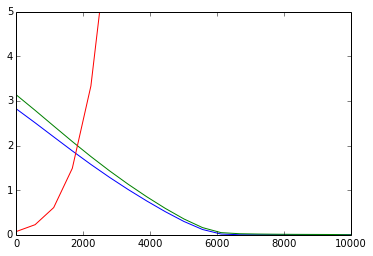

In [60]:
plot(x,R[1:xM+2])
plot(x,P[1:xM+2])
plot(x,u1[1:xM+2]/numol)
plot(x,u2[1:xM+2]/numol)
ylim(0,5)
axis=([0, L, 0, 3])
print(u1m/numol,u2m/numol,R,P)


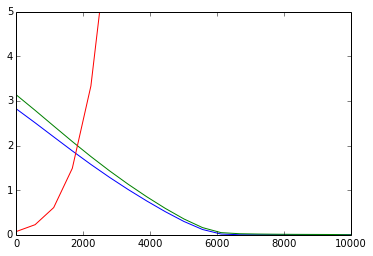

In [54]:
plot(x,R[1:xM+2])
plot(x,P[1:xM+2])
plot(x,u1[1:xM+2]/numol)
plot(x,u2[1:xM+2]/numol)
ylim(0,5)
axis=([0, L, 0, 3])
#print(u1m/numol,u2m/numol,R,P)


In [15]:
from numpy import save,load
save('data.npy',[R,P,u1,u2])
[A,B,C,D]=load('data.npy')
print(R,A)

[ 0.01937938  0.02712363  0.04555777  0.06657949  0.08719973  0.10608618
  0.12245731  0.13575679  0.14556594  0.15158488  0.15363167  0.15164449
  0.14568243  0.13592394  0.12266398  0.10631388  0.08741937  0.06674772
  0.04561441  0.02699357  0.0189779 ] [ 0.01937938  0.02712363  0.04555777  0.06657949  0.08719973  0.10608618
  0.12245731  0.13575679  0.14556594  0.15158488  0.15363167  0.15164449
  0.14568243  0.13592394  0.12266398  0.10631388  0.08741937  0.06674772
  0.04561441  0.02699357  0.0189779 ]


In [10]:
""" Generate GIF Figure"""
movie('tmp*.png',encoder='convert', fps=4, quiet=True, output_file='comp1.gif')




Found 72 files of the format tmp*.png.


In [11]:
from IPython.core.display import HTML
HTML(data='<img src="files/comp1.gif" />')

In [9]:
from scitools.easyviz import *

movie('tmp*.eps',encoder='ffmpeg', fps=20, vcodec='libvpx', quiet=True, output_file='comp.webm')




Found 99 files of the format tmp*.eps.


In [12]:
from IPython.core.display import HTML
video = open("comp.webm", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/webm;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

In [88]:
Snumber=100
SampleSize=[Snumber,Snumber]
SampleMatrix=zeros(SampleSize)

"""
mu1=mut1=muh1=0.09;
mu2=mut2=muh2=0.05;
"""
em=linspace(0.6,0.8,Snumber);
en=linspace(0.6,0.8,Snumber);

In [140]:
t_begin=time.time()
# i=75-99
for i in arange(18,19):
    mu1=mut1=muh1=em[i];
    for j in arange(0,25):
        #print(j)
        mu2=mut2=muh2=en[j];
        R=R0*ones([3+xM])
        Rm=R0*ones([3+xM])
        Rp=R0*ones([3+xM])
        P=P0*ones([3+xM])
        Pm=P0*ones([3+xM])
        Pp=P0*ones([3+xM])

        u1=u10*ones([3+xM])
        u1m=u10*ones([3+xM])
        u1p=u10*ones([3+xM])

        u2=u20*ones([3+xM])
        u2m=u20*ones([3+xM])
        u2p=u20*ones([3+xM])
        
        RGL=2*nu*dx/delta*(RB(0)-R0)+R0;
        RGR=R0;

        PGL=2*nu*dx/delta*(PB(0)-P0)+P0;
        PGR=P0;
        u1GL=-2*nu*dx/delta*u10+u10;
        u1GR=u10;

        u2GL=-2*nu*dx/delta*u20+u20;
        u2GR=u20;

        Rm[1:xM+2]=R0*ones([xM+1])
        Rm[0]=RGL
        Rm[-1]=RGR
    
        Pm[1:xM+2]=P0*ones([xM+1])
        Pm[0]=PGL
        Pm[-1]=PGR

        u1m[1:xM+2]=u10*ones([xM+1])
        u1m[0]=u1GL
        u1m[-1]=u1GR

        u2m[1:xM+2]=u20*ones([xM+1])
        u2m[0]=u2GL
        u2m[-1]=u2GR
        
        t=0.0
        tstop=10;
        t +=dt
        
        #mm=10000
        mm=365*tN;
        scale=5*tN
        while t<=mm*dt:                       
           R[1:xM+2]=master1(Rm,Pm,u1m,u2m);
           P[1:xM+2]=master1(Pm,Rm,u1m,u2m);
    
           u1[1:xM+2]=master2(Rm,Pm,u1m,h1);
           u2[1:xM+2]=master2(Rm,Pm,u2m,h2);
              
           R[1:xM+2]=(R[1:xM+2]+abs(R[1:xM+2]))/2.
           P[1:xM+2]=(P[1:xM+2]+abs(P[1:xM+2]))/2.
           u1[1:xM+2]=(u1[1:xM+2]+abs(u1[1:xM+2]))/2.
           u2[1:xM+2]=(u2[1:xM+2]+abs(u2[1:xM+2]))/2. 
   
           R[0]=(delta*dtdxdx)*(Rm[1]+RGL)+nu*dtdx2*(RGL-Rm[1]) \
                  +(1-2*delta*dtdxdx)*Rm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
           R[-1]=(delta*dtdxdx)*(Rm[xM]+RGR)+nu*dtdx2*(Rm[xM]-RGR) \
                  +(1-2*delta*dtdxdx)*Rm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1])
           RGL=2*nu*dx/delta*(RB(t)-R[1])+R[2];
           RGR=R[xM+1];         
    
           P[0]=(delta*dtdxdx)*(Pm[1]+PGL)+nu*dtdx2*(PGL-Pm[1]) \
                  +(1-2*delta*dtdxdx)*Pm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
           P[-1]=(delta*dtdxdx)*(Pm[xM]+PGR)+nu*dtdx2*(Pm[xM]-PGR) \
                  +(1-2*delta*dtdxdx)*Pm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1])
           PGL=2*nu*dx/delta*(PB(t)-P[1])+P[2];
           PGR=P[xM+1];
    
           u1[0]=(delta*dtdxdx)*(u1m[1]+u1GL)+nu*dtdx2*(u1GL-u1m[1]) \
                  +(1-2*delta*dtdxdx)*u1m[0]+dt*h10(Rm[0],Pm[0])*u1m[0];
           u1[-1]=(delta*dtdxdx)*(u1m[xM]+u1GR)+nu*dtdx2*(u1m[xM]-u1GR) \
                  +(1-2*delta*dtdxdx)*u1m[-1]+dt*h10(Rm[-1],Pm[-1])*u1m[-1];
                  
           u1GL=-2*nu*dx/delta*u1[1]+u1[2];
           u1GR=u1[xM+1];
    
           u2[0]=(delta*dtdxdx)*(u2m[1]+u2GL)+nu*dtdx2*(u2GL-u2m[1]) \
                  +(1-2*delta*dtdxdx)*u2m[0]+dt*h20(Rm[0],Pm[0])*u2m[0];
           u2[-1]=(delta*dtdxdx)*(u2m[xM]+u2GR)+nu*dtdx2*(u2m[xM]-u2GR) \
                  +(1-2*delta*dtdxdx)*u2m[-1]+dt*h20(Rm[-1],Pm[-1])*u2m[-1];
                  
           u2GL=-2*nu*dx/delta*u2[1]+u2[2];
           u2GR=u2[xM+1];
    
           t+=dt;
           Rm,R=R,Rm
           Pm,P=P,Pm
           u1m,u1=u1,u1m
           u2m,u2=u2,u2m
           
        if (u1[xM]/numol>2 and u2[xM]/numol>2):
           SampleMatrix[i,j]=3;
        elif (u1[xM]/numol>2 and u2[xM]/numol<2):
            SampleMatrix[i,j]=1;
        elif (u1[xM]/numol<2 and u2[xM]/numol>2):
            SampleMatrix[i,j]=2;
        else:
            SampleMatrix[i,j]=0;
        #print i,j, SampleMatrix[i,j]
t_end=time.time()
print(t_end-t_begin)       

96.33386659622192


In [89]:
#from numpy import save,load

#SampleMatrix[16:18,0:20]=1*ones([2,20])
#save('map1.npy',SampleMatrix)
SampleMatrix=load('map1.npy')
#print(SampleMatrix)

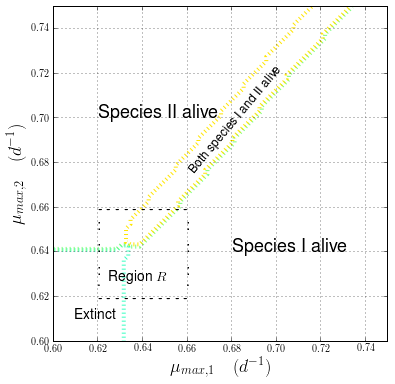

In [99]:
from matplotlib import rc

figure(figsize=(6,6))
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#rcParams['text.usetex'] = True
#imshow(SampleMatrix.transpose(),origin='lower',extent=[em[0],em[-1],en[0],en[-1]])
#contour(SampleMatrix.transpose(),extent=[em[0],em[-1],en[0],en[-1]],linestyles='dotted',linewidths=4)
contour(SampleMatrix[0:75,0:75].transpose(),extent=[0.6,0.75,en[0],0.75],levels=[-2,-0.5,0.5,1,2,3,4],linestyles='dotted',linewidths=4)

#colorbar()
grid()

text(0.68,0.64,'Species I alive',size=18)
text(0.62,0.70,'Species II alive',size=18)
text(0.66,0.72,'Both species I and II alive',size=12,rotation=50)
text(0.61,0.61,'Extinct',size=14)
text(0.62,0.617,'- - - - - - - - - - -',size=14)
text(0.62,0.63,':',size=14);text(0.62,0.64,':',size=14);text(0.62,0.65,':',size=14);text(0.62,0.625,".",size=14);
text(0.66,0.63,':',size=14);text(0.66,0.64,':',size=14);text(0.66,0.65,':',size=14);text(0.66,0.625,".",size=14);
text(0.625,0.627,'Region $R$',size=14);
text(0.62,0.657,'- - - - - - - - - - - ',size=14)


xlabel(r'$\mu_{max,1}\quad(d^{-1})$',size=18)
ylabel(r'$\mu_{max,2}\quad(d^{-1})$',size=18)
#title(r'$K_1=0.002,K_2=0.005$',size=16)
savefig('1.eps')

#show()

In [52]:
print(SampleMatrix[-1,-1])
print(SampleMatrix[81:83,82:84])

1.0
[[ 0.  2.]
 [ 1.  3.]]


In [43]:
Subnumber1=20
Subnumber2=20
SampleSizeZ=[Subnumber1,Subnumber2]
SampleMatrixZ=zeros(SampleSizeZ)
#print(SampleMatrix1)

In [44]:
nu1bound=[0.62,0.66]
nu2bound=[0.62,0.66]

em1=linspace(nu1bound[0],nu1bound[1],Subnumber1);
en1=linspace(nu2bound[0],nu2bound[1],Subnumber2);

In [32]:
t_begin=time.time()
# i=75-99
for i in arange(Subnumber1):
    mu1=mut1=muh1=em1[i];
    for j in arange(Subnumber2):
        #print(j)
        mu2=mut2=muh2=en1[j];
        R=R0*ones([3+xM])
        Rm=R0*ones([3+xM])
        Rp=R0*ones([3+xM])
        P=P0*ones([3+xM])
        Pm=P0*ones([3+xM])
        Pp=P0*ones([3+xM])

        u1=u10*ones([3+xM])
        u1m=u10*ones([3+xM])
        u1p=u10*ones([3+xM])

        u2=u20*ones([3+xM])
        u2m=u20*ones([3+xM])
        u2p=u20*ones([3+xM])
        
        RGL=2*nu*dx/delta*(RB(0)-R0)+R0;
        RGR=R0;

        #mm=10000
        mm=365*tN;
        scale=5*tN
        while t<=mm*dt:     
           R[1:xM+2]=master1(Rm,Pm,u1m,u2m);
           P[1:xM+2]=master1(Pm,Rm,u1m,u2m);
    
           u1[1:xM+2]=master2(Rm,Pm,u1m,h1);
           u2[1:xM+2]=master2(Rm,Pm,u2m,h2);
            
           R[1:xM+2]=(R[1:xM+2]+abs(R[1:xM+2]))/2.
           P[1:xM+2]=(P[1:xM+2]+abs(P[1:xM+2]))/2.
           u1[1:xM+2]=(u1[1:xM+2]+abs(u1[1:xM+2]))/2.
           u2[1:xM+2]=(u2[1:xM+2]+abs(u2[1:xM+2]))/2. 
                   
           R[0]=(delta*dtdxdx)*(Rm[1]+RGL)+nu*dtdx2*(RGL-Rm[1]) \
                  +(1-2*delta*dtdxdx)*Rm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
           R[-1]=(delta*dtdxdx)*(Rm[xM]+RGR)+nu*dtdx2*(Rm[xM]-RGR) \
                  +(1-2*delta*dtdxdx)*Rm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
           RGL=2*nu*dx/delta*(RB(t)-R[1])+R[2];
           RGR=R[xM+1];         
    
           P[0]=(delta*dtdxdx)*(Pm[1]+PGL)+nu*dtdx2*(PGL-Pm[1]) \
                  +(1-2*delta*dtdxdx)*Pm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
           P[-1]=(delta*dtdxdx)*(Pm[xM]+PGR)+nu*dtdx2*(Pm[xM]-PGR) \
                  +(1-2*delta*dtdxdx)*Pm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[
        PGL=2*nu*dx/delta*(PB(0)-P0)+P0;
        PGR=P0;
        u1GL=-2*nu*dx/delta*u10+u10;
        u1GR=u10;

        u2GL=-2*nu*dx/delta*u20+u20;
        u2GR=u20;

        Rm[1:xM+2]=R0*ones([xM+1])
        Rm[0]=RGL
        Rm[-1]=RGR
    
        Pm[1:xM+2]=P0*ones([xM+1])
        Pm[0]=PGL
        Pm[-1]=PGR

        u1m[1:xM+2]=u10*ones([xM+1])
        u1m[0]=u1GL
        u1m[-1]=u1GR

        u2m[1:xM+2]=u20*ones([xM+1])
        u2m[0]=u2GL
        u2m[-1]=u2GR
        
        t=0.0
        tstop=10;
        t +=dt
        -1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
           PGL=2*nu*dx/delta*(PB(t)-P[1])+P[2];
           PGR=P[xM+1];
    
           u1[0]=(delta*dtdxdx)*(u1m[1]+u1GL)+nu*dtdx2*(u1GL-u1m[1]) \
                  +(1-2*delta*dtdxdx)*u1m[0]+dt*h10(Rm[0],Pm[0])*u1m[0];
           u1[-1]=(delta*dtdxdx)*(u1m[xM]+u1GR)+nu*dtdx2*(u1m[xM]-u1GR) \
                  +(1-2*delta*dtdxdx)*u1m[-1]+dt*h10(Rm[-1],Pm[-1])*u1m[-1];
                  
           u1GL=-2*nu*dx/delta*u1[1]+u1[2];
           u1GR=u1[xM+1];
    
           u2[0]=(delta*dtdxdx)*(u2m[1]+u2GL)+nu*dtdx2*(u2GL-u2m[1]) \
                  +(1-delta*dtdxdx)*u2m[0]+dt*h20(Rm[0],Pm[0])*u2m[0];
           u2[-1]=(delta*dtdxdx)*(u2m[xM]+u2GR)+nu*dtdx2*(u2m[xM]-u2GR) \
                  +(1-2*delta*dtdxdx)*u2m[-1]+dt*h20(Rm[-1],Pm[-1])*u2m[-1];
                  
           u2GL=-2*nu*dx/delta*u2[1]+u2[2];
           u2GR=u2[xM+1];
    
           t+=dt;
           Rm,R=R,Rm
           Pm,P=P,Pm
           u1m,u1=u1,u1m
           u2m,u2=u2,u2m
           
        if (u1[xM]/numol>3 and u2[xM]/numol>3):
           SampleMatrixZ[i,j]=3;
        elif (u1[xM]/numol>3 and u2[xM]/numol<3):
            #SampleMatrix1[i,j]=1;
            SampleMatrixZ[i,j]=1;
        elif (u1[xM]/numol<3 and u2[xM]/numol>3):
            SampleMatrixZ[i,j]=2;
        else:
            SampleMatrixZ[i,j]=0;    
        #print i,j, SampleMatrix[i,j]
t_end=time.time()
print(t_end-t_begin)    

1514.8661646842957


In [45]:
#from numpy import save,load
#save('submap.npy',SampleMatrixZ)
SampleMatrixZ=load('submap.npy')
#print(SampleMatrix1[80:85,:])
#print(SampleMatrixZ)

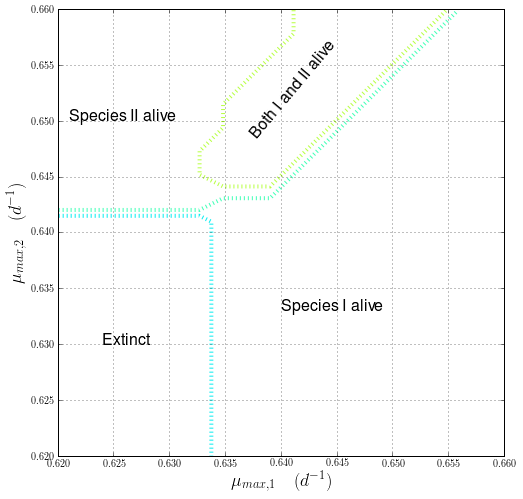

In [97]:
figure(figsize=(8,8))
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#rcParams['text.usetex'] = True
#imshow(SampleMatrixZ.transpose(),origin='lower',extent=[nu1bound[0],nu1bound[1],nu2bound[0],nu2bound[1]])
contour(SampleMatrixZ.transpose(),extent=[nu1bound[0],nu1bound[1],nu2bound[0],nu2bound[1]],levels=[-2,-0.5,0.5,1,2,3,4,5],linestyles='dotted',linewidths=4)
xlabel(r'$\mu_{max,1}\quad(d^{-1})$',size=18)
ylabel(r'$\mu_{max,2}\quad(d^{-1})$',size=18)
#title(r'$K_1=0.002,K_2=0.005$',size=16)
grid(True)
text(0.64,0.633,'Species I alive',size=16)
text(0.621,0.65,'Species II alive',size=16)
text(0.637,0.6565,'Both I and II alive',rotation=50,size=16)
text(0.624,0.63,'Extinct',size=16)
savefig('1.eps')
#show()
#savefig('3.eps')
#colorbar()

In [3]:
# nu / delta Ratio
rationumber=20
RatioSize=[rationumber,rationumber]
RatioMatrix=zeros(RatioSize)

In [4]:
nubound=[0.05,0.09]
nu1=linspace(nubound[0],nubound[1],rationumber)
nuary=nu1*L
print(nuary)
print(K1)

[ 500.          521.05263158  542.10526316  563.15789474  584.21052632
  605.26315789  626.31578947  647.36842105  668.42105263  689.47368421
  710.52631579  731.57894737  752.63157895  773.68421053  794.73684211
  815.78947368  836.84210526  857.89473684  878.94736842  900.        ]
0.005


In [5]:
#nubound=[-3,2]
deltabound=[100000,300000]

#nuary=linspace(nubound[0],nubound[1],rationumber);
delary=linspace(deltabound[0],deltabound[1],rationumber);
lifeL=1
mu1=mut1=muh1=0.6

In [34]:
t_begin=time.time()
# i=75-990.5,
for i in arange(rationumber):
    nu=nuary[i];
    for j in arange(rationumber):
        delta=delary[j]
        R=R0*ones([3+xM])
        Rm=R0*ones([3+xM])
        Rp=R0*ones([3+xM])
        P=P0*ones([3+xM])
        Pm=P0*ones([3+xM])
        Pp=P0*ones([3+xM])

        u1=u10*ones([3+xM])
        u1m=u10*ones([3+xM])
        u1p=u10*ones([3+xM])

        """
        u2=u20*ones([3+xM])
        u2m=u20*ones([3+xM])
        u2p=u20*ones([3+xM])
        """
        RGL=2*nu*dx/delta*(RB(0)-R0)+R0;
        RGR=R0;

        PGL=2*nu*dx/delta*(PB(0)-P0)+P0;
        PGR=P0;
        u1GL=-2*nu*dx/delta*u10+u10;
        u1GR=u10;
        """
        u2GL=-2*nu*dx/delta*u20+u20;
        u2GR=u20;
        """
        Rm[1:xM+2]=R0*ones([xM+1])
        Rm[0]=RGL
        Rm[-1]=RGR
    
        Pm[1:xM+2]=P0*ones([xM+1])
        Pm[0]=PGL
        Pm[-1]=PGR

        u1m[1:xM+2]=u10*ones([xM+1])
        u1m[0]=u1GL
        u1m[-1]=u1GR
        """
        u2m[1:xM+2]=u20*ones([xM+1])
        u2m[0]=u2GL
        u2m[-1]=u2GR
        """
        t=0.0
        tstop=5;
        t +=dt
        
        #mm=10000
        mm=365*tN;
        scale=5*tN
        while t<=mm*dt:     
           R[1:xM+2]=master3(Rm,Pm,u1m);
           P[1:xM+2]=master3(Pm,Rm,u1m);
    
           u1[1:xM+2]=master2(Rm,Pm,u1m,h1);
           #u2[1:xM+2]=master2(Rm,Pm,u2m,h2);
           R[1:xM+2]=(R[1:xM+2]+abs(R[1:xM+2]))/2.
           P[1:xM+2]=(P[1:xM+2]+abs(P[1:xM+2]))/2.
           u1[1:xM+2]=(u1[1:xM+2]+abs(u1[1:xM+2]))/2.
           #u2[1:xM+2]=(u2[1:xM+2]+abs(u2[1:xM+2]))/2.
            
                 
           R[0]=(delta*dtdxdx)*(Rm[1]+RGL)+nu*dtdx2*(RGL-Rm[1]) \
                  +(1-2*delta*dtdxdx)*Rm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0]);
           #       +q2r*h20(Rm[0],Pm[0])*u2m[0]);
           R[-1]=(delta*dtdxdx)*(Rm[xM]+RGR)+nu*dtdx2*(Rm[xM]-RGR) \
                  +(1-2*delta*dtdxdx)*Rm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1]);
           #       +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
           RGL=2*nu*dx/delta*(RB(t)-R[1])+R[2];
           RGR=R[xM+1];         
    
           P[0]=(delta*dtdxdx)*(Pm[1]+PGL)+nu*dtdx2*(PGL-Pm[1]) \
                  +(1-2*delta*dtdxdx)*Pm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0]) \
           #       +q2r*h20(Rm[0],Pm[0])*u2m[0]);
           P[-1]=(delta*dtdxdx)*(Pm[xM]+PGR)+nu*dtdx2*(Pm[xM]-PGR) \
                  +(1-2*delta*dtdxdx)*Pm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1]) \
           #       +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
           PGL=2*nu*dx/delta*(PB(t)-P[1])+P[2];
           PGR=P[xM+1];
    
           u1[0]=(delta*dtdxdx)*(u1m[1]+u1GL)+nu*dtdx2*(u1GL-u1m[1]) \
                  +(1-2*delta*dtdxdx)*u1m[0]+dt*h10(Rm[0],Pm[0])*u1m[0];
           u1[-1]=(delta*dtdxdx)*(u1m[xM]+u1GR)+nu*dtdx2*(u1m[xM]-u1GR) \
                  +(1-2*delta*dtdxdx)*u1m[-1]+dt*h10(Rm[-1],Pm[-1])*u1m[-1];
                  
           u1GL=-2*nu*dx/delta*u1[1]+u1[2];
           u1GR=u1[xM+1];
           """
           u2[0]=(delta*dtdxdx2)*(u2m[1]+u2GL)+nu*dtdx2*(u2GL-u2m[1]) \
                  +(1-delta*dtdxdx)*u2m[0]+dt*h20(Rm[0],Pm[0])*u2m[0];
           u2[-1]=(delta*dtdxdx2)*(u2m[xM]+u2GR)+nu*dtdx2*(u2m[xM]-u2GR) \
                  +(1-delta*dtdxdx)*u2m[-1]+dt*h20(Rm[-1],Pm[-1])*u2m[-1];
                  
           u2GL=-2*nu*dx/delta*u2[1]+u2[2];
           u2GR=u2[xM+1];
           """
           t+=dt;
           Rm,R=R,Rm
           Pm,P=P,Pm
           u1m,u1=u1,u1m
           #u2m,u2=u2,u2m
           
        if (u1[xM]/numol>lifeL):
           RatioMatrix[i,j]=1;
        else:
            RatioMatrix[i,j]=0;    
        #print i,j, SampleMatrix[i,j]
t_end=time.time()
print(t_end-t_begin)    

1151.955284833908


In [32]:
#from numpy import save,load
#save('deltanu.npy',RatioMatrix)
RatioMatrix=load('deltanu.npy')
#print(SampleMatrix1[80:85,:])
#print(SampleMatrixZ)
#RatioMatrix1=load('Singlemap.npy')
#print(u1m,delary,nuary,RatioMatrix)

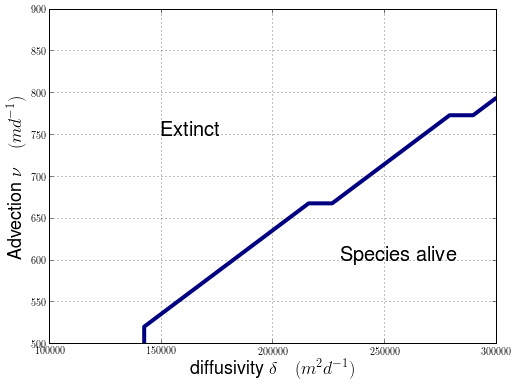

In [86]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('fromfont',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
figure(figsize=(8,6))

#contourf(2*RatioMatrix,origin="lower",extent=[deltabound[0],deltabound[1],nubound[0],nubound[1]])
contour(delary,nuary,RatioMatrix,extent=[deltabound[0],deltabound[1],nuary[0],nuary[-1]],levels=[0,1,2,3],linewidths=4)#,origin="lower",extent=[deltabound[0],deltabound[1],nubound[0],nubound[1]])

#imshow(2*RatioMatrix,origin='lower') #,extent=[deltabound[0],deltabound[1],nubound[0],nubound[1]])
#xticks(nuary,delary)
#yticks(nuary)
ylabel(r'Advection $\nu\quad(m d^{-1})$',size=18)
xlabel(r'diffusivity $\delta\quad(m^2 d^{-1})$',size=18)
#title(r'$K_1=0.002,K_2=0.005,\mu_1=0.64$',size=16)
#text(185000,575,'$\longrightarrow$ Species II alive',size=16,color='orange');
#text(195000,620,'$\longrightarrow$ Species I alive',size=16,color='blue');
text(150000,750,'Extinct',size=20);
text(230000,600,'Species alive',size=20);

#title('$k_1=0.002,k_2=0.005$',size=18)
grid(True)
#colorbar()
savefig('delmut.eps')
#print(u1)

In [29]:
RatioMatrix2=RatioMatrix
RatioMatrix3=(RatioMatrix1+RatioMatrix)

ValueError: operands could not be broadcast together with shapes (48,24) (20,20) 

NameError: name 'u1' is not defined

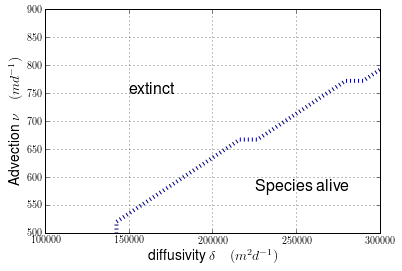

In [39]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('fromfont',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
figure(figsize=(6,4))

#contourf(2*RatioMatrix,origin="lower",extent=[deltabound[0],deltabound[1],nubound[0],nubound[1]])
contour(delary,nuary,RatioMatrix,extent=[deltabound[0],deltabound[1],nuary[0],nuary[-1]])#,origin="lower",extent=[deltabound[0],deltabound[1],nubound[0],nubound[1]])

#imshow(2*RatioMatrix,origin='lower') #,extent=[deltabound[0],deltabound[1],nubound[0],nubound[1]])
#xticks(nuary,delary)
#yticks(nuary)
ylabel(r'Advection $\nu\quad(m d^{-1})$',size=14)
xlabel(r'diffusivity $\delta\quad(m^2 d^{-1})$',size=14)
#title(r'$K_1=0.002,K_2=0.005,\mu_1=0.64$',size=16)
text(225000,575,'Species alive',size=16);
text(150000,750,'extinct',size=16);
grid(True)
#colorbar()
savefig('1.eps')
print(u1)

In [31]:
#from numpy import save,load
#save('Twinmap1.npy',RatioMatrix3)
#save('Twinmap11.npy',RatioMatrix1)
#save('Twinmap12.npy',RatioMatrix2)
RatioMaxtrix1=load('Twinmap11.npy')
RatioMaxtrix2=load('Twinmap12.npy')
RatioMaxtrix3=load('Twinmap1.npy')
#RatioMatrix=load('Singlemap1.npy')
#print(SampleMatrix[80:85,:])
print(size(RatioMatrix2))

400


In [56]:
deg=arange(-3,5,0.5)
biNum=size(deg)
muRange=arange(0.63,0.67,0.0025)
bimuNum=size(muRange)

biSize=[bimuNum,biNum]
biMatrix=zeros(biSize)

#print(SampleMatrix1)

In [57]:
u10=0.5*numol
nu=0.08*L
lifeL=2
print(deg,u10,nu)

(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ,  3.5,  4. ,  4.5]), 500000.0, 800.0)


In [61]:
t_begin=time.time()
# i=75-990.5,
for i in arange(bimuNum):
    mu1=mut1=muh1=mu2=mut2=muh2=muRange[i];
    for j in arange(biNum):
        u20=u10*pow(10,deg[j])
        R=R0*ones([3+xM])
        Rm=R0*ones([3+xM])
        Rp=R0*ones([3+xM])
        P=P0*ones([3+xM])
        Pm=P0*ones([3+xM])
        Pp=P0*ones([3+xM])

        u1=u10*ones([3+xM])
        u1m=u10*ones([3+xM])
        u1p=u10*ones([3+xM])

        u2=u20*ones([3+xM])
        u2m=u20*ones([3+xM])
        u2p=u20*ones([3+xM])
        
        RGL=2*nu*dx/delta*(RB(0)-R0)+R0;
        RGR=R0;

        PGL=2*nu*dx/delta*(PB(0)-P0)+P0;
        PGR=P0;
        u1GL=-2*nu*dx/delta*u10+u10;
        u1GR=u10;

        u2GL=-2*nu*dx/delta*u20+u20;
        u2GR=u20;

        Rm[1:xM+2]=R0*ones([xM+1])
        Rm[0]=RGL
        Rm[-1]=RGR
    
        Pm[1:xM+2]=P0*ones([xM+1])
        Pm[0]=PGL
        Pm[-1]=PGR

        u1m[1:xM+2]=u10*ones([xM+1])
        u1m[0]=u1GL
        u1m[-1]=u1GR

        u2m[1:xM+2]=u20*ones([xM+1])
        u2m[0]=u2GL
        u2m[-1]=u2GR
        
        t=0.0
        #tstop=10;
        t +=dt
        
        #mm=10000
        mm=365*tN;
        scale=5*tN
        while t<=mm*dt:     
           R[1:xM+2]=master1(Rm,Pm,u1m,u2m);
           P[1:xM+2]=master1(Pm,Rm,u1m,u2m);
    
           u1[1:xM+2]=master2(Rm,Pm,u1m,h1);
           u2[1:xM+2]=master2(Rm,Pm,u2m,h2);
            
           R[1:xM+2]=(R[1:xM+2]+abs(R[1:xM+2]))/2.
           P[1:xM+2]=(P[1:xM+2]+abs(P[1:xM+2]))/2.
           u1[1:xM+2]=(u1[1:xM+2]+abs(u1[1:xM+2]))/2.
           u2[1:xM+2]=(u2[1:xM+2]+abs(u2[1:xM+2]))/2.
                 
           R[0]=(delta*dtdxdx)*(Rm[1]+RGL)+nu*dtdx2*(RGL-Rm[1]) \
                  +(1-2*delta*dtdxdx)*Rm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
           R[-1]=(delta*dtdxdx)*(Rm[xM]+RGR)+nu*dtdx2*(Rm[xM]-RGR) \
                  +(1-2*delta*dtdxdx)*Rm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
           RGL=2*nu*dx/delta*(RB(t)-R[1])+R[2];
           RGR=R[xM+1];         
    
           P[0]=(delta*dtdxdx)*(Pm[1]+PGL)+nu*dtdx2*(PGL-Pm[1]) \
                  +(1-2*delta*dtdxdx)*Pm[0]-dt*(q1r*h10(Rm[0],Pm[0])*u1m[0] \
                  +q2r*h20(Rm[0],Pm[0])*u2m[0]);
           P[-1]=(delta*dtdxdx)*(Pm[xM]+PGR)+nu*dtdx2*(Pm[xM]-PGR) \
                  +(1-2*delta*dtdxdx)*Pm[-1]-dt*(q1r*h10(Rm[-1],Pm[-1])*u1m[-1] \
                  +q2r*h20(Rm[-1],Pm[-1])*u2m[-1]);
           PGL=2*nu*dx/delta*(PB(t)-P[1])+P[2];
           PGR=P[xM+1];
    
           u1[0]=(delta*dtdxdx)*(u1m[1]+u1GL)+nu*dtdx2*(u1GL-u1m[1]) \
                  +(1-2*delta*dtdxdx)*u1m[0]+dt*h10(Rm[0],Pm[0])*u1m[0];
           u1[-1]=(delta*dtdxdx)*(u1m[xM]+u1GR)+nu*dtdx2*(u1m[xM]-u1GR) \
                  +(1-2*delta*dtdxdx)*u1m[-1]+dt*h10(Rm[-1],Pm[-1])*u1m[-1];
                  
           u1GL=-2*nu*dx/delta*u1[1]+u1[2];
           u1GR=u1[xM+1];
    
           u2[0]=(delta*dtdxdx)*(u2m[1]+u2GL)+nu*dtdx2*(u2GL-u2m[1]) \
                  +(1-2*delta*dtdxdx)*u2m[0]+dt*h20(Rm[0],Pm[0])*u2m[0];
           u2[-1]=(delta*dtdxdx)*(u2m[xM]+u2GR)+nu*dtdx2*(u2m[xM]-u2GR) \
                  +(1-2*delta*dtdxdx)*u2m[-1]+dt*h20(Rm[-1],Pm[-1])*u2m[-1];
                  
           u2GL=-2*nu*dx/delta*u2[1]+u2[2];
           u2GR=u2[xM+1];
    
           t+=dt;
           Rm,R=R,Rm
           Pm,P=P,Pm
           u1m,u1=u1,u1m
           u2m,u2=u2,u2m
           
        if (u1[xM]/numol>lifeL and u2[xM]/numol>lifeL):
           biMatrix[i,j]=3;
        elif (u1[xM]/numol>lifeL and u2[xM]/numol<lifeL):
            #SampleMatrix1[i,j]=1;
            biMatrix[i,j]=1;
        elif (u1[xM]/numol<lifeL and u2[xM]/numol>lifeL):
            biMatrix[i,j]=2;
        else:
            biMatrix[i,j]=0;    
        #print i,j, SampleMatrix[i,j]
t_end=time.time()
print(t_end-t_begin)    

1124.2812399864197


In [58]:
#from numpy import save,load
#save('bimap.npy',biMatrix)
biMatrix=load('bimap.npy')
#print(nu,u2,biMatrix)

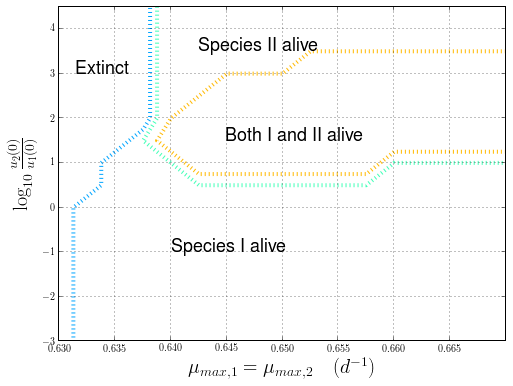

In [87]:
figure(figsize=(8,6))
contour(biMatrix.transpose(),extent=[muRange[0],muRange[-1],deg[0],deg[-1]],levels=[-0.5,0.5,1,2,3],linestyles='dotted',linewidths=4)
#imshow(biMatrix)#,extent=[L[0],L[-1],muRange[0],muRange[-1]])
ylabel(r'$\log_{10} \frac {u_2(0)}{u_1(0)}$',size=20)
xlabel(r'$\mu_{max,1}=\mu_{max,2}\quad (d^{-1})$',size=20)
#title(r'$K_1=0.002,K_2=0.005$',size=16)
grid(True)

text(muRange[5],deg[-3],'Species II alive',size=18)
text(muRange[4],deg[4],'Species I alive',size=18)
text(muRange[6],deg[9],'Both I and II alive',size=18)
text(muRange[1]-0.001,deg[-4],'Extinct',size=18)

#colorbar()
savefig('bistability-1.eps')

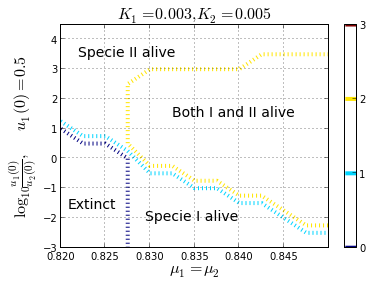

In [41]:
#contour(biMatrix.transpose(),extent=[muRange[0],muRange[-1],L[0],L[-1]],linestyles='dotted',linewidths=4)
contour(muRange,L,biMatrix.transpose(),levels=[0,1,2,3],linestyles='dotted',linewidths=4)
#imshow(biMatrix)#,extent=[L[0],L[-1],muRange[0],muRange[-1]])
ylabel(r'$\log_{10}\frac{u_1(0)}{u_2(0)},\quad u_1(0)=0.5 $',size=16)
xlabel(r'$\mu_1=\mu_2$',size=16)
title(r'$K_1=0.003,K_2=0.005$',size=16)
grid(True)

text(muRange[0]+0.002,L[-4]+0.4,'Specie II alive',size=14)
text(muRange[3]+0.002,L[3]-0.6,'Specie I alive',size=14)
text(muRange[5],L[8]+0.4,'Both I and II alive',size=14)
text(muRange[0]+0.001,L[3]-0.2,'Extinct',size=14)

colorbar()
show()
#savefig('2.eps')

In [1]:
%%bash

ipython nbconvert --to html CompModel15.ipynb


[NbConvertApp] Using existing profile dir: u'/Users/cchcch/.ipython/profile_default'
[NbConvertApp] Converting notebook CompModel15.ipynb to html
[NbConvertApp] Support files will be in CompModel15_files/
[NbConvertApp] Loaded template full.tpl
[NbConvertApp] Writing 1054361 bytes to CompModel15.html
